In [1]:
import pandas as pd
df=pd.read_csv("Loan.csv")
df.head()

,loanId,memberId,date,purpose,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,loanStatus
0,1888978,2305095,12/10/2014,debtconsolidation,0.0,25190.0,60 months,6.25,490,E3,Current
1,1299695,2610493,9/15/2014,debtconsolidation,0.0,21189.0,60 months,10.49,455,B3,Current
2,1875016,2491679,9/11/2014,debtconsolidation,0.0,29908.0,60 months,9.11,622,B2,Current
3,1440478,2092798,4/22/2016,homeimprovement,0.0,13053.0,48 months,11.89,343,B3,Current
4,1124634,2633077,2/3/2016,debtconsolidation,0.0,24613.0,60 months,15.13,587,A3,Current


In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loanId              100000 non-null  int64  
 1   memberId            100000 non-null  int64  
 2   date                100000 non-null  object 
 3   purpose             100000 non-null  object 
 4   isJointApplication  99029 non-null   float64
 5   loanAmount          98994 non-null   float64
 6   term                98929 non-null   object 
 7   interestRate        100000 non-null  float64
 8   monthlyPayment      100000 non-null  int64  
 9   grade               100000 non-null  object 
 10  loanStatus          100000 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 8.4+ MB


loanId                   0
memberId                 0
date                     0
purpose                  0
isJointApplication     971
loanAmount            1006
term                  1071
interestRate             0
monthlyPayment           0
grade                    0
loanStatus               0
dtype: int64

In [6]:
import sqlite3

In [7]:
conn = sqlite3.connect("Loan_database.db")

df.to_sql("Loan_data",conn,if_exists = "replace",index=False)

print("Data Ingestion Completed Successfully!")

Data Ingestion Completed Successfully!


In [8]:
pd.read_sql("SELECT * FROM Loan_data LIMIT 5",conn)

,loanId,memberId,date,purpose,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,loanStatus
0,1888978,2305095,12/10/2014,debtconsolidation,0.0,25190.0,60 months,6.25,490,E3,Current
1,1299695,2610493,9/15/2014,debtconsolidation,0.0,21189.0,60 months,10.49,455,B3,Current
2,1875016,2491679,9/11/2014,debtconsolidation,0.0,29908.0,60 months,9.11,622,B2,Current
3,1440478,2092798,4/22/2016,homeimprovement,0.0,13053.0,48 months,11.89,343,B3,Current
4,1124634,2633077,2/3/2016,debtconsolidation,0.0,24613.0,60 months,15.13,587,A3,Current


In [9]:
df.shape

(100000, 11)

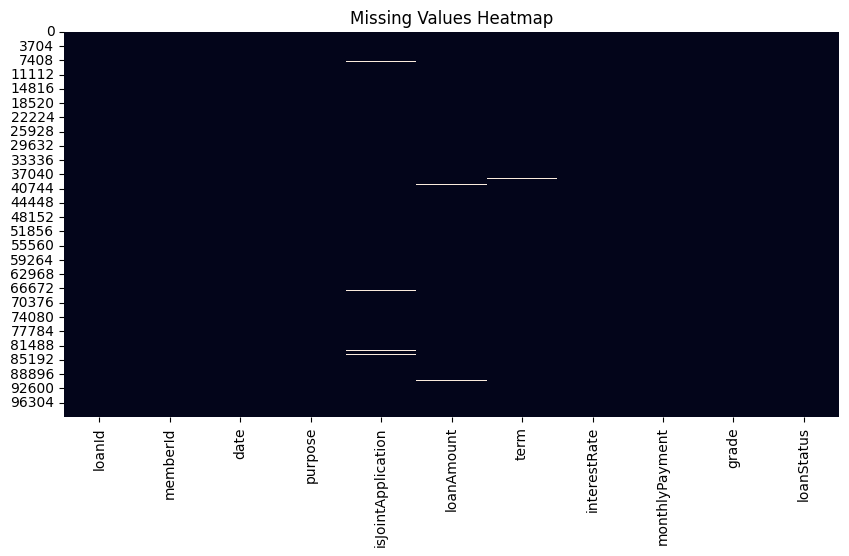

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

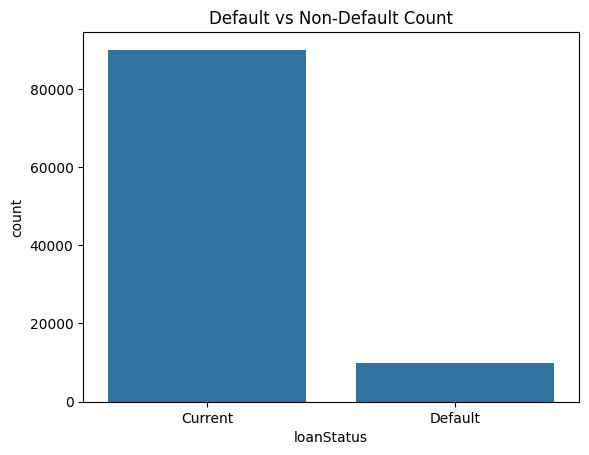

In [13]:
sns.countplot(x='loanStatus',data=df)
plt.title("Default vs Non-Default Count")
plt.show()

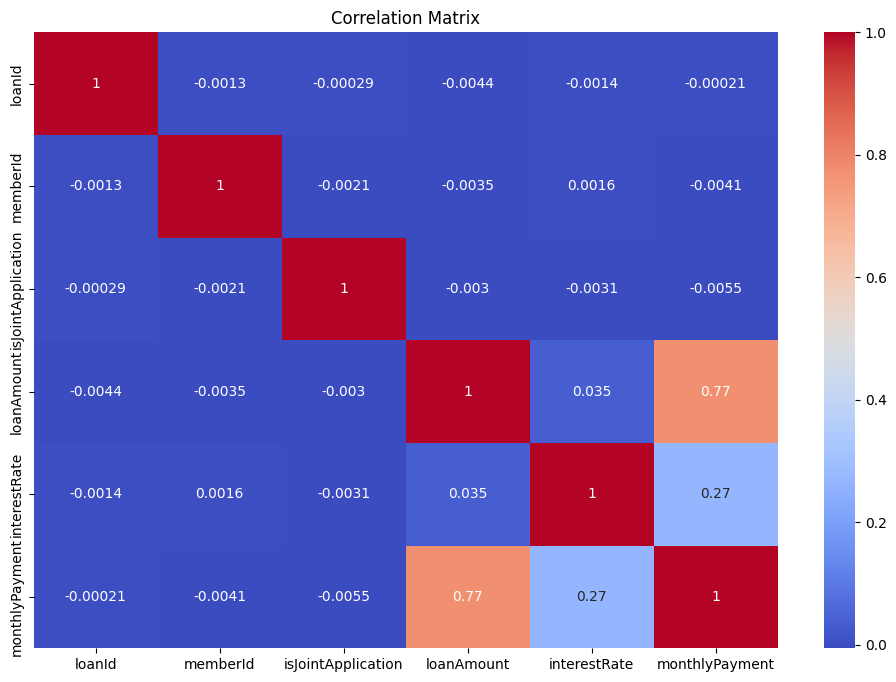

In [19]:
numeric_df=df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [20]:
df.describe(include='all')

,loanId,memberId,date,purpose,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,loanStatus
count,1.000000e+05,1.000000e+05,100000,100000,99029.000000,98994.000000,98929,100000.000000,100000.000000,100000,100000
unique,NaN,NaN,780,7,NaN,NaN,3,NaN,NaN,15,2
top,NaN,NaN,12/20/2015,debtconsolidation,NaN,NaN,60 months,NaN,NaN,A1,Current
freq,NaN,NaN,162,81344,NaN,NaN,33971,NaN,NaN,11251,89996
mean,1.450032e+06,2.449892e+06,NaN,NaN,0.050167,20658.524587,NaN,10.977799,552.448620,NaN,NaN
std,2.598208e+05,2.596111e+05,NaN,NaN,0.218291,4731.560429,NaN,3.904456,165.072058,NaN,NaN
min,1.000027e+06,2.000006e+06,NaN,NaN,0.000000,1618.000000,NaN,4.020000,42.000000,NaN,NaN
25%,1.224922e+06,2.226133e+06,NaN,NaN,0.000000,17480.000000,NaN,7.980000,434.000000,NaN,NaN
50%,1.450832e+06,2.448687e+06,NaN,NaN,0.000000,20600.000000,NaN,10.460000,534.000000,NaN,NaN
75%,1.674496e+06,2.674204e+06,NaN,NaN,0.000000,23786.000000,NaN,13.440000,655.000000,NaN,NaN


In [21]:
categorical=df.select_dtypes(include='object').columns
numeric=df.select_dtypes(include=['int64','float64']).columns
categorical,numeric

(Index(['date', 'purpose', 'term', 'grade', 'loanStatus'], dtype='object'),
 Index(['loanId', 'memberId', 'isJointApplication', 'loanAmount',
        'interestRate', 'monthlyPayment'],
       dtype='object'))